In [1]:
import numpy as np

import torch
from torch import nn

import matplotlib
import matplotlib.pyplot as plt

from IPython import display

In [2]:
input = torch.tensor([[0, 0], [0, 0.5], [0, 1],
                      [0.5, 0], [0.5, 0.5], [0.5, 1],
                      [1, 0], [1, 0.5], [1, 1]])

expected = torch.tensor([0, 0, 0,
                         0, 0, 1,
                         0, 1, 1]).reshape(9, 1).to(torch.float32)

In [3]:
valsX = np.linspace(-1.0, 3.0, 25)
valsY = np.linspace(-1.0, 3.0, 25)
coords = np.array([[x, y] for x in valsX for y in valsY])
rbCmap = matplotlib.colors.ListedColormap([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0]])

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [5]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train_loop():
    # Compute prediction and loss
    out = model(input)
    loss = loss_fn(out, expected)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss

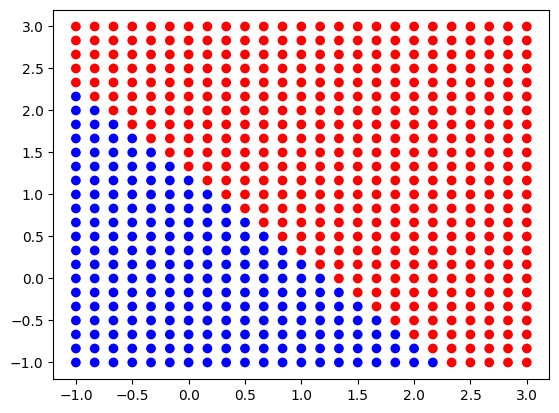

0.19894951581954956


AttributeError: 'function' object has no attribute 'clear_output'

In [9]:
pred = model(torch.tensor(coords).to(torch.float32)).flatten().detach().numpy()

fig, ax = plt.subplots()
scat = ax.scatter(coords[:, 0], coords[:, 1], c=pred, cmap=rbCmap, norm=matplotlib.colors.CenteredNorm(0.5))
plt.show()

epochs = 40000
for t in range(epochs):
    loss = train_loop()

    if t % (epochs / 10) == 0:
        print(loss.item())

        pred = model(torch.tensor(coords).to(torch.float32)).flatten().detach().numpy()
        scat.set_array(pred)

        display.clear_output(wait=True)
        plt.show()

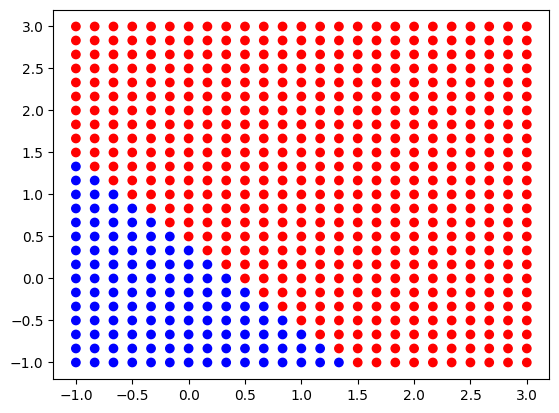

In [7]:
pred2 = model(torch.tensor(coords).to(torch.float32)).flatten().detach().numpy()

fig2, ax2 = plt.subplots()
scat = ax2.scatter(coords[:, 0], coords[:, 1], c=pred2, vmin=-1, vmax=1, cmap=rbCmap)